In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
Df = pd.read_csv('C:/Users/Anirudh MV/Downloads/delivery_time.csv')
Df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
Df. describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


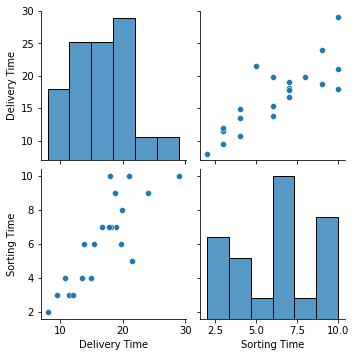

In [4]:
sns.pairplot(Df.iloc[:,0:2])

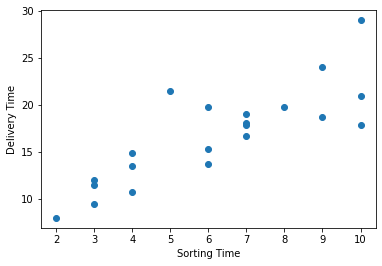

In [7]:
plt.scatter(x = Df['Sorting Time'], y = Df['Delivery Time'])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [8]:
Df. corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [10]:
Df1 = Df.rename(columns={'Delivery Time':'deli_time','Sorting Time':'sort_time'})
Df1.columns

Index(['deli_time', 'sort_time'], dtype='object')

In [11]:
Df1.sort_time.corr(Df1.deli_time)

0.8259972607955325

In [12]:
np.corrcoef(Df1.sort_time,Df1.deli_time)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [14]:
linear_model=smf.ols("sort_time~deli_time",data=Df1).fit()
linear_model.params
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sort_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        14:28:26   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
deli_time      0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
linear_model.conf_int(0.05)

,0,1
Intercept,-3.130058,1.616712
deli_time,0.278169,0.549318


In [16]:
prediction = linear_model.predict(Df1.iloc[:,0])
print(prediction)

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64


In [20]:
x=np.array([Df1["sort_time"]]).reshape(-1,1)
y=np.array([Df1["deli_time"]]).reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

x_train

array([[ 7],
       [10],
       [ 4],
       [ 2],
       [ 7],
       [ 5],
       [ 7],
       [ 3],
       [ 6],
       [ 7],
       [ 4],
       [10],
       [ 6],
       [ 4],
       [ 9]], dtype=int64)

In [21]:
y_train

array([[16.68],
       [29.  ],
       [14.88],
       [ 8.  ],
       [19.  ],
       [21.5 ],
       [17.83],
       [ 9.5 ],
       [15.35],
       [18.11],
       [10.75],
       [21.  ],
       [19.75],
       [13.5 ],
       [24.  ]])

In [22]:
model = LinearRegression().fit(x_train,y_train)
model.score(x_test,y_test)*100

-29.52739553554713

In [23]:
print(' x_test\n',x_test)
print('\n y_test \n',y_test)

 x_test
 [[ 3]
 [10]
 [ 9]
 [ 3]
 [ 8]
 [ 6]]

 y_test 
 [[12.03]
 [17.9 ]
 [18.75]
 [11.5 ]
 [19.83]
 [13.75]]


In [24]:
y_pred=model.predict(x_test)
print(y_pred)

[[11.11458199]
 [25.13455788]
 [23.13170418]
 [11.11458199]
 [21.12885048]
 [17.12314309]]


<function matplotlib.pyplot.show(close=None, block=None)>

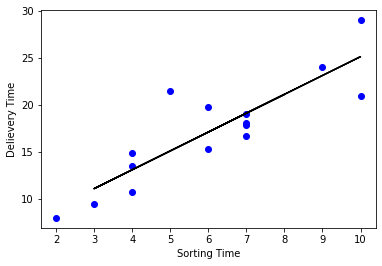

In [26]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,y_pred,color='k')
plt.xlabel("Sorting Time")
plt.ylabel("Delievery Time")
plt.show